In [164]:
import pandas as pd
import re

In [165]:
# Đọc dữ liệu từ file CSV
file_path = '/Users/nhotin/Documents/GitHub/LegalBizAI_project/test_set/cleaning/QA.thuvienphapluat.csv'
df = pd.read_csv(file_path)

In [166]:
df.head()

,question,answer,references
0,Hội đồng giải thể doanh nghiệp do Nhà nước nắm...,Theo quy định tại Điều 44 Nghị định 23/2022/NĐ...,Điều 44 Nghị định 23/2022/NĐ-CP
1,Có được quyền kéo dài thêm thời hạn giải thể d...,Theo quy định tại Điều 47 Nghị định 23/2022/NĐ...,Điều 47 Nghị định 23/2022/NĐ-CP
2,Khi giải thể doanh nghiệp do Nhà nước nắm giữ ...,Theo quy định tại khoản 2 Điều 39 Nghị định 23...,khoản 2 Điều 39 Nghị định 23/2022/NĐ-CP
3,Hồ sơ giải thể doanh nghiệp mới nhất năm 2023 ...,Căn cứ theo quy định tại khoản 1 Điều 210 Luật...,khoản 1 Điều 210 Luật Doanh nghiệp 2020
4,Thứ tự thanh toán khoản nợ của doanh nghiệp gi...,Theo quy định tại khoản 5 Điều 208 Luật Doanh ...,khoản 5 Điều 208 Luật Doanh nghiệp 2020


In [167]:
def extract_dieu(reference):
    # Kiểm tra nếu reference không phải là chuỗi thì trả về giá trị ban đầu
    if not isinstance(reference, str):
        return reference
    # Tìm và giữ lại phần "Điều" và số đi kèm
    match = re.search(r'Điều \d+', reference)
    if match:
        return match.group(0)
    return reference
df['references'] = df['references'].apply(extract_dieu)


In [168]:
df.head(10)

,question,answer,references
0,Hội đồng giải thể doanh nghiệp do Nhà nước nắm...,Theo quy định tại Điều 44 Nghị định 23/2022/NĐ...,Điều 44
1,Có được quyền kéo dài thêm thời hạn giải thể d...,Theo quy định tại Điều 47 Nghị định 23/2022/NĐ...,Điều 47
2,Khi giải thể doanh nghiệp do Nhà nước nắm giữ ...,Theo quy định tại khoản 2 Điều 39 Nghị định 23...,Điều 39
3,Hồ sơ giải thể doanh nghiệp mới nhất năm 2023 ...,Căn cứ theo quy định tại khoản 1 Điều 210 Luật...,Điều 210
4,Thứ tự thanh toán khoản nợ của doanh nghiệp gi...,Theo quy định tại khoản 5 Điều 208 Luật Doanh ...,Điều 208
5,Phòng Đăng ký kinh doanh phải chuyển tình trạn...,Theo quy định tại khoản 3 Điều 208 Luật Doanh ...,Điều 208
6,Các khoản nợ của doanh nghiệp tư nhân giải thể...,Các khoản nợ của doanh nghiệp tư nhân giải thể...,Điều 208
7,Tình trạng đã phá sản của doanh nghiệp là gì?,"“Đã phá sản"" được giải thích tại khoản 6 Điều ...",Điều 41
8,Chuyển tình trạng pháp lý của doanh nghiệp tro...,Quy trình đăng tải quyết định mở thủ tục phá s...,Điều 78
9,Hội đồng giải thể doanh nghiệp do Nhà nước nắm...,Theo quy định tại khoản 3 Điều 43 Nghị định 23...,Điều 43


In [169]:
def print_missing_values(df):
    missing_values = df[df['references'].isnull()]
    print("Missing values in 'references' column:")
    display(missing_values)
print_missing_values(df)

Missing values in 'references' column:


,question,answer,references
73,"Chức năng, nhiệm vụ và quyền hạn của báo chí?","Theo khoản 1, khoản 2 Điều 3 Luật Báo chí 2016...",NaN
75,Trưởng Đoàn kiểm tra hoạt động thẩm định giá c...,Tiêu chuẩn của Trưởng Đoàn và thành viên Đoàn ...,NaN
76,Báo cáo tình hình hoạt động đại lý thuế được t...,Báo cáo tình hình hoạt động đại lý thuế được t...,NaN
89,Trình tự tiến hành buộc chấm dứt hoạt động kin...,"Căn cứ khoản 2, khoản 3, khoản 4 và khoản 5 Đi...",NaN
100,Chi phí của tổ chức tài chính vi mô gồm những ...,"Điều 17 Nghị định 93/2017/NĐ-CP, hướng dẫn cụ ...",NaN
...,...,...,...
6676,Quyền và nghĩa vụ của thành viên giao dịch đặc...,"Theo điểm a, điểm c khoản 1 và khoản 2 Điều 8 ...",NaN
6683,Cơ sở đăng kiểm tàu cá được phân loại như thế ...,Căn cứ khoản 1 Điều 55 Nghị định 26/2019/NĐ-CP...,NaN
6685,Chính sách mới từ 20/5/2023 về đề án phát triể...,NaN,NaN
6690,Hiệu lực của Giấy chứng nhận đăng ký bảo hộ th...,Căn cứ theo quy định tại Điều 93 Luật Sở hữu t...,NaN


In [170]:
def drop_missing_values(df):
    df_cleaned = df.dropna(subset=['references'])
    return df_cleaned
df = drop_missing_values(df)

In [171]:
df.tail()

,question,answer,references
6684,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Điều 87
6686,Tài sản góp vốn khi thành lập doanh nghiệp có ...,Tài sản góp vốn khi thành lập doanh nghiệp đượ...,Điều 34
6687,Công ty TNHH 2 thành viên trở lên sẽ chia lợi ...,Nguyên tắc chia lợi nhuận cho các thành viên t...,Điều 24
6688,Điều kiện để công ty TNHH 2 thành viên trở lên...,Để chia lợi nhuận cho các thành viên thì công ...,Điều 69
6689,Tổng giám đốc công ty TNHH 2 thành viên trở lê...,Việc Tổng giám đốc công ty TNHH 2 thành viên t...,Điều 63


In [172]:
dieu_counts = df['references'].value_counts()
print(dieu_counts)

references
Điều 24                                                                                                      151
Điều 31                                                                                                      122
Điều 23                                                                                                      120
Điều 12                                                                                                      106
Điều 45                                                                                                       99
                                                                                                            ... 
 Nghị định 08/2023/NĐ-CP                                                                                       2
Điều 2                                                                                                         1
theo Luật Doanh nghiệp 2020                                                          

In [173]:
df = df[df['references'].str.startswith('Điều', na=False)]
dieu_counts = df['references'].value_counts()
print(dieu_counts)

references
Điều 24     151
Điều 31     122
Điều 23     120
Điều 12     106
Điều 45      99
           ... 
Điều 131      2
Điều 128      2
Điều 61       2
Điều 158      2
Điều 2        1
Name: count, Length: 205, dtype: int64


In [174]:
df.head()

,question,answer,references
0,Hội đồng giải thể doanh nghiệp do Nhà nước nắm...,Theo quy định tại Điều 44 Nghị định 23/2022/NĐ...,Điều 44
1,Có được quyền kéo dài thêm thời hạn giải thể d...,Theo quy định tại Điều 47 Nghị định 23/2022/NĐ...,Điều 47
2,Khi giải thể doanh nghiệp do Nhà nước nắm giữ ...,Theo quy định tại khoản 2 Điều 39 Nghị định 23...,Điều 39
3,Hồ sơ giải thể doanh nghiệp mới nhất năm 2023 ...,Căn cứ theo quy định tại khoản 1 Điều 210 Luật...,Điều 210
4,Thứ tự thanh toán khoản nợ của doanh nghiệp gi...,Theo quy định tại khoản 5 Điều 208 Luật Doanh ...,Điều 208


In [175]:
df['id'] = pd.Series(dtype='Int64')
df.head()

,question,answer,references,id
0,Hội đồng giải thể doanh nghiệp do Nhà nước nắm...,Theo quy định tại Điều 44 Nghị định 23/2022/NĐ...,Điều 44,<NA>
1,Có được quyền kéo dài thêm thời hạn giải thể d...,Theo quy định tại Điều 47 Nghị định 23/2022/NĐ...,Điều 47,<NA>
2,Khi giải thể doanh nghiệp do Nhà nước nắm giữ ...,Theo quy định tại khoản 2 Điều 39 Nghị định 23...,Điều 39,<NA>
3,Hồ sơ giải thể doanh nghiệp mới nhất năm 2023 ...,Căn cứ theo quy định tại khoản 1 Điều 210 Luật...,Điều 210,<NA>
4,Thứ tự thanh toán khoản nợ của doanh nghiệp gi...,Theo quy định tại khoản 5 Điều 208 Luật Doanh ...,Điều 208,<NA>


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5720 entries, 0 to 6689
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    5720 non-null   object
 1   answer      5720 non-null   object
 2   references  5720 non-null   object
 3   id          0 non-null      Int64 
dtypes: Int64(1), object(3)
memory usage: 229.0+ KB


In [177]:
jsonfile = '/Users/nhotin/Documents/GitHub/LegalBizAI_project/test_set/id_cof/all_chunk.json'
data = pd.read_json(jsonfile)

In [178]:
data.head(10)

,id,len,title,passage
0,0,53,Điều 1. Phạm vi điều chỉnh của Luật Doanh nghiệp,Điều 1. Phạm vi điều chỉnh của Luật Doanh nghi...
1,1,35,Điều 2. Đối tượng áp dụng của Luật Doanh nghiệp,Điều 2. Đối tượng áp dụng của Luật Doanh nghiệ...
2,2,39,Điều 3. Áp dụng Luật Doanh nghiệp và luật khác,Điều 3. Áp dụng Luật Doanh nghiệp và luật khác...
3,3,185,Điều 4. Giải thích từ ngữ,"Điều 4. Giải thích từ ngữ\nTrong Luật này, các..."
4,4,182,Điều 4. Giải thích từ ngữ,Điều 4. Giải thích từ ngữ\n8. Cổng thông tin q...
5,5,201,Điều 4. Giải thích từ ngữ,Điều 4. Giải thích từ ngữ\n13. Địa chỉ liên lạ...
6,6,169,Điều 4. Giải thích từ ngữ,Điều 4. Giải thích từ ngữ\n18. Góp vốn là việc...
7,7,208,Điều 4. Giải thích từ ngữ,Điều 4. Giải thích từ ngữ\n22. Người có quan h...
8,8,218,Điều 4. Giải thích từ ngữ,"Điều 4. Giải thích từ ngữ\nđ) Vợ, chồng, bố đẻ..."
9,9,225,Điều 4. Giải thích từ ngữ,Điều 4. Giải thích từ ngữ\n25. Người thành lập...


In [179]:
#df.to_csv('qaset.csv', index=False) 

In [180]:
dou = '/Users/nhotin/Documents/GitHub/LegalBizAI_project/test_set/cleaning/QA_with2refereces.json'
double = pd.read_json(dou)

In [181]:
double.head()

,question,answer,references
0,Phòng Đăng ký kinh doanh phải chuyển tình trạn...,Theo quy định tại khoản 3 Điều 208 Luật Doanh ...,"[khoản 3 Điều 208 Luật Doanh nghiệp 2020, khoả..."
1,Doanh nghiệp do Nhà nước nắm giữ 100% vốn điều...,Theo quy định tại khoản 2 Điều 88 Luật Doanh n...,"[khoản 2 Điều 88 Luật Doanh nghiệp 2020, khoản..."
2,Giải thể chi nhánh là gì?,Căn cứ theo quy định tại khoản 1 Điều 44 Luật ...,"[ khoản 1 Điều 44 Luật Doanh nghiệp 2020, Điề..."
3,Giấy tờ pháp lý của cá nhân đối với chủ doanh ...,Căn cứ tại Điều 21 Nghị định 01/2021/NĐ-CP quy...,"[Điều 21 Nghị định 01/2021/NĐ-CP, khoản 16 Điề..."
4,Việc đặt tên địa điểm kinh doanh được quy định...,Tên địa điểm kinh doanh được đặt theo quy định...,"[Điều 40 Luật Doanh nghiệp 2020, Điều 20 Nghị ..."


In [182]:
def extract_articles(reference):
    if isinstance(reference, str):
        reference_list = eval(reference)
    else:
        reference_list = reference
    # Biểu thức chính quy để tìm các "Điều mấy"
    pattern = re.compile(r'Điều \d+')
    matches = []
    for ref in reference_list:
        matches.extend(pattern.findall(ref))
    return ', '.join(matches)

In [183]:
double['references'] = double['references'].apply(extract_articles)
double.head()

,question,answer,references
0,Phòng Đăng ký kinh doanh phải chuyển tình trạn...,Theo quy định tại khoản 3 Điều 208 Luật Doanh ...,"Điều 208, Điều 70"
1,Doanh nghiệp do Nhà nước nắm giữ 100% vốn điều...,Theo quy định tại khoản 2 Điều 88 Luật Doanh n...,"Điều 88, Điều 12"
2,Giải thể chi nhánh là gì?,Căn cứ theo quy định tại khoản 1 Điều 44 Luật ...,"Điều 44, Điều 213"
3,Giấy tờ pháp lý của cá nhân đối với chủ doanh ...,Căn cứ tại Điều 21 Nghị định 01/2021/NĐ-CP quy...,"Điều 21, Điều 4"
4,Việc đặt tên địa điểm kinh doanh được quy định...,Tên địa điểm kinh doanh được đặt theo quy định...,"Điều 40, Điều 20"


In [184]:
#double.to_csv('1.csv', index=False) 

In [185]:
df.tail()

,question,answer,references,id
6684,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Điều 87,<NA>
6686,Tài sản góp vốn khi thành lập doanh nghiệp có ...,Tài sản góp vốn khi thành lập doanh nghiệp đượ...,Điều 34,<NA>
6687,Công ty TNHH 2 thành viên trở lên sẽ chia lợi ...,Nguyên tắc chia lợi nhuận cho các thành viên t...,Điều 24,<NA>
6688,Điều kiện để công ty TNHH 2 thành viên trở lên...,Để chia lợi nhuận cho các thành viên thì công ...,Điều 69,<NA>
6689,Tổng giám đốc công ty TNHH 2 thành viên trở lê...,Việc Tổng giám đốc công ty TNHH 2 thành viên t...,Điều 63,<NA>


In [186]:
qas = '/Users/nhotin/Documents/GitHub/LegalBizAI_project/test_set/cleaning/qaset.csv'
qa = pd.read_csv(qas)

In [187]:
qa.head()

,question,answer,references,id,type_question
0,Phòng Đăng ký kinh doanh phải chuyển tình trạn...,Theo quy định tại khoản 3 Điều 208 Luật Doanh ...,"Điều 208, Điều 70",NaN,NaN
1,Doanh nghiệp do Nhà nước nắm giữ 100% vốn điều...,Theo quy định tại khoản 2 Điều 88 Luật Doanh n...,"Điều 88, Điều 12",NaN,NaN
2,Giải thể chi nhánh là gì?,Căn cứ theo quy định tại khoản 1 Điều 44 Luật ...,"Điều 44, Điều 213",NaN,NaN
3,Giấy tờ pháp lý của cá nhân đối với chủ doanh ...,Căn cứ tại Điều 21 Nghị định 01/2021/NĐ-CP quy...,"Điều 21, Điều 4",NaN,NaN
4,Việc đặt tên địa điểm kinh doanh được quy định...,Tên địa điểm kinh doanh được đặt theo quy định...,"Điều 40, Điều 20",NaN,NaN


In [188]:
qa.tail()

,question,answer,references,id,type_question
5934,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Cá nhân sản xuất đồ gỗ xây dựng muốn đăng ký h...,Điều 87,NaN,reasoning
5935,Tài sản góp vốn khi thành lập doanh nghiệp có ...,Tài sản góp vốn khi thành lập doanh nghiệp đượ...,Điều 34,NaN,reasoning
5936,Công ty TNHH 2 thành viên trở lên sẽ chia lợi ...,Nguyên tắc chia lợi nhuận cho các thành viên t...,Điều 24,NaN,reasoning
5937,Điều kiện để công ty TNHH 2 thành viên trở lên...,Để chia lợi nhuận cho các thành viên thì công ...,Điều 69,NaN,query
5938,Tổng giám đốc công ty TNHH 2 thành viên trở lê...,Việc Tổng giám đốc công ty TNHH 2 thành viên t...,Điều 63,NaN,reasoning


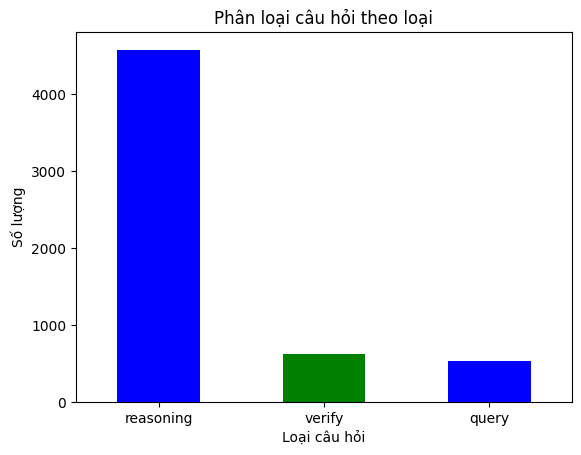

In [189]:
df = pd.DataFrame(qa)

# Đếm số lượng giá trị trong mỗi loại
type_counts = df['type_question'].value_counts()

# Vẽ biểu đồ cột
type_counts.plot(kind='bar', rot=0, color=['b', 'g'])

# Thêm nhãn trục và tiêu đề
plt.xlabel('Loại câu hỏi')
plt.ylabel('Số lượng')
plt.title('Phân loại câu hỏi theo loại')

# Hiển thị biểu đồ
plt.show()